In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
import joblib

In [60]:
import pandas as pd
data = pd.read_csv("data/customer_churn_data.csv") 

In [61]:
data=data.drop(columns=['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','PaperlessBilling',
       'PaymentMethod','TotalCharges'])

In [62]:
print(data.columns)
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
data['Contract'] = data['Contract'].replace({'Month-to-month': 0, 'One year': 1,'Two year':2})

Index(['tenure', 'Contract', 'MonthlyCharges', 'Churn'], dtype='object')


In [63]:

# Colonnes utiles pour le clustering
X = data[['Contract', 'tenure', 'MonthlyCharges']]

In [64]:
# Échelle standardisée (très important pour le clustering !)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# 2 groupes par exemple
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [66]:
data['Cluster'] = kmeans.labels_
print(data[['Contract', 'tenure', 'MonthlyCharges', 'Cluster']].head(12))

    Contract  tenure  MonthlyCharges  Cluster
0          0      23           49.85        0
1          0      43          100.70        0
2          1      51           97.33        0
3          0      72          101.38        0
4          0      25           52.22        0
5          1      35          116.96        0
6          1      17           91.53        0
7          1      18           26.52        1
8          1      27           67.77        1
9          1      15           86.45        0
10         0      69           36.87        0
11         2      15          110.18        1


In [67]:
new_client = pd.DataFrame({'Contract': [0], 'tenure': [2], 'MonthlyCharges': [2]})
new_client_scaled = scaler.transform(new_client)

cluster_pred = kmeans.predict(new_client_scaled)
print("Ce client appartient au cluster :", cluster_pred[0])


Ce client appartient au cluster : 0


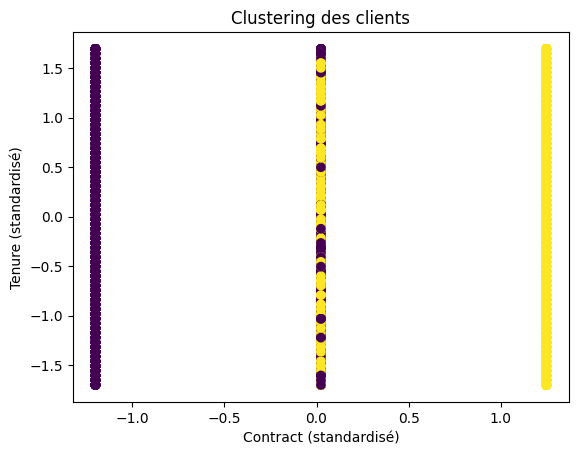

In [68]:

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Clustering des clients")
plt.xlabel("Contract (standardisé)")
plt.ylabel("Tenure (standardisé)")
plt.show()

In [69]:
# Par exemple, pour chaque cluster, la moyenne des variables
print(data.groupby('Cluster')[['Contract', 'tenure', 'MonthlyCharges']].mean())


         Contract     tenure  MonthlyCharges
Cluster                                     
0        0.323056  36.597855       78.703830
1        1.658149  36.498964       61.352041
